# Lec03 - Visualization and Univariate Linear Regressions

- Section 0. Loading the data with quick preprocessing.
- Section 1. Visualization (continued)
  - Summarizing one variable.
  - Summarizing two variables
  - Describing all variables.
  - Others (not included): subplots, seaborn, etc. (please Google them)
- Section 2. Univariate regression.
  - Example 1. Only Y.
  - Example 2. X and Y (X is continuous)
  - Example 3. X and Y (X is binary discrete)

We will use Matplotlib for visualization and statsmodels.api for regression. Today's lab session includes three small exercises to facilitate the practice.

## Section 0. Loading the data

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this is the new module we will use today for linear regression
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load the csv file using pandas
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)

In [3]:
df

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,15742.0,15742.0,7957.0,7785.0,41.0,5517.0,15742.0,13894.0,1128.0,64.0,...,0.000000,0.062212,0.164241,0.084891,0.002066,0.251197,0.401551,0.426820,1.217872,0.099118
4163,5723.0,5723.0,2914.0,2809.0,43.0,2001.0,5723.0,4664.0,482.0,0.0,...,0.017050,0.047581,0.215161,0.084563,0.007005,0.306730,0.411036,0.440678,1.260370,0.039827
4164,10342.0,10342.0,4657.0,5685.0,37.6,3746.0,10342.0,7956.0,1351.0,13.0,...,0.000000,0.038862,0.137002,0.030591,0.002049,0.169643,0.353295,0.482692,1.332621,0.041208
4165,8960.0,8960.0,4166.0,4794.0,37.2,3324.0,8960.0,6286.0,1831.0,0.0,...,0.024021,0.064132,0.174399,0.063014,0.003126,0.240540,0.363482,0.478571,1.290012,0.017440


**Preprocessing** Creating a discrete independent variable (high vs. low income groups).

In [4]:
# create columns: high_inc and low_inc - [x<50000, 50000<x]; 50000 is an arbitrary threshold
# 1. creating three separate columns
df['high_inc'] = df['inc_median_household'] > 50000
df['low_inc'] = df['inc_median_household'] <= 50000
df['high_inc']

0        True
1       False
2       False
3       False
4        True
        ...  
4162     True
4163     True
4164     True
4165     True
4166    False
Name: high_inc, Length: 4167, dtype: bool

In [5]:
# 2. creating one column with two values
df['inc_median_household_discrete'] = 1 # assigning the medium income group
df.loc[df['inc_median_household'] < 50000, 'inc_median_household_discrete'] = 0 # assigning the low income group
df['inc_median_household_discrete']

0       1
1       0
2       0
3       0
4       1
       ..
4162    1
4163    1
4164    1
4165    1
4166    0
Name: inc_median_household_discrete, Length: 4167, dtype: int64

## Section 1. Visualization

1.   Summarizing one variable
2.   Summarizing two variables
3.   Summarizing the dataframe



**Basic Plot**

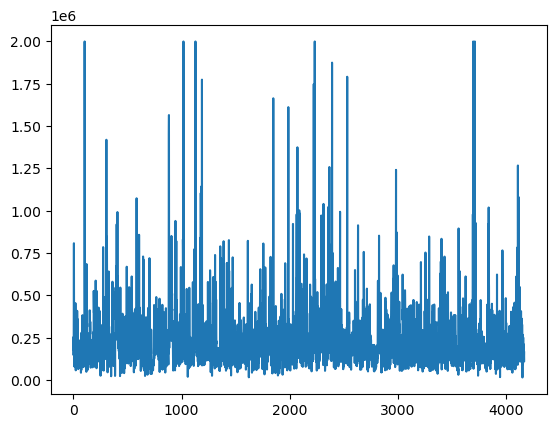

In [6]:
# Basic plot without formating
plt.plot(df['property_value_median'])

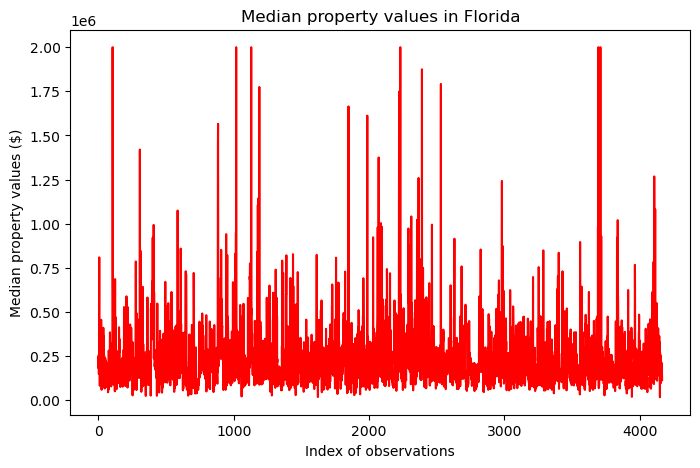

In [7]:
# Basic plot with formating
plt.figure(figsize=(8,5)) # define the figure size
plt.plot(df['property_value_median'], color='red') # plot the curve
plt.ylabel('Median property values ($)') # add the label on the y axis.
plt.xlabel('Index of observations') # add the label on the x axis.
plt.title('Median property values in Florida') # add the title
plt.show()

**Histogram**

(array([2343., 1417.,  264.,   75.,   37.,   11.,    4.,    3.,    5.,
           8.]),
 array([  15800. ,  214220.1,  412640.2,  611060.3,  809480.4, 1007900.5,
        1206320.6, 1404740.7, 1603160.8, 1801580.9, 2000001. ]),
 <BarContainer object of 10 artists>)

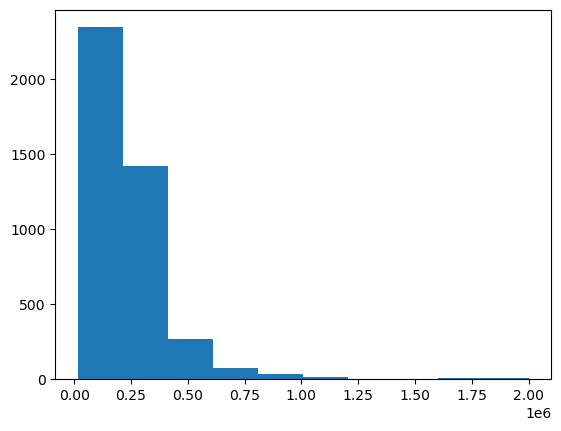

In [8]:
# Histogram without formating
plt.hist(df['property_value_median'])

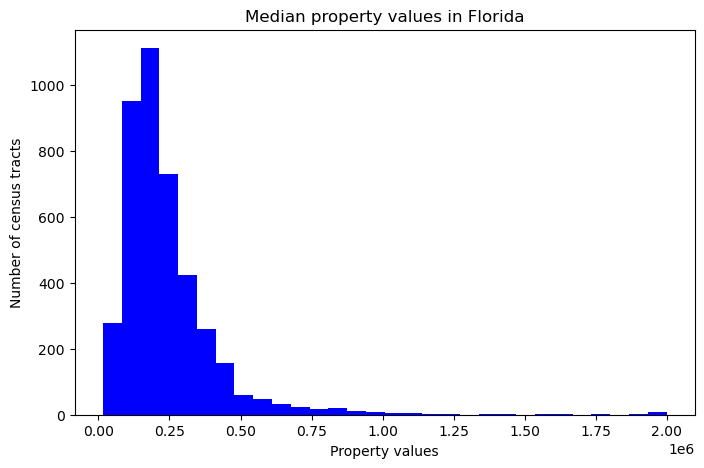

In [9]:
# Histogram with formating
plt.figure(figsize=(8,5)) # define the figure size
plt.hist(df['property_value_median'], bins=30, color='blue') # plot the histogram
plt.ylabel('Number of census tracts') # add the label on the y axis.
plt.xlabel('Property values') # add the label on the x axis.
plt.title('Median property values in Florida') # add the title
plt.show()

**Bar Plot**

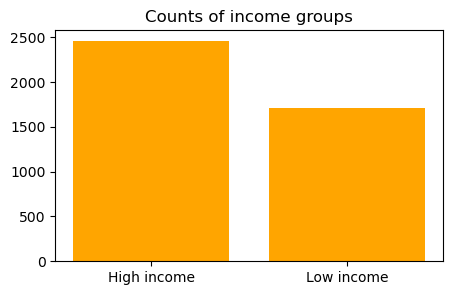

In [10]:
# summarizing the counts of high and low income households
# preparing the data
labels = ['High income', 'Low income']
values = df[['high_inc', 'low_inc']].sum().values

# Bar plot
plt.figure(figsize=(5,3), dpi=100)
bars = plt.bar(labels, values, color = 'orange')
plt.title("Counts of income groups")
plt.show()


In [11]:
values

array([2455, 1712])

### **Exercise 1.** Plot the histogram of median household income.


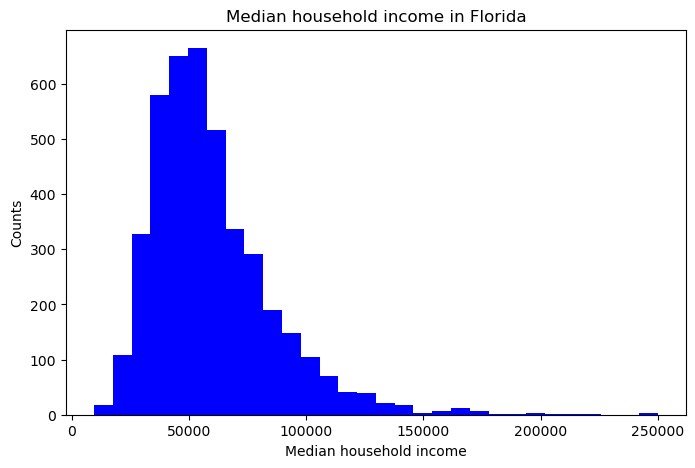

In [12]:
# Histogram with formating
plt.figure(figsize=(8,5)) # define the figure size
plt.hist(df['inc_median_household'], bins=30, color='blue') # plot the histogram
plt.ylabel('Counts') # add the label on the y axis.
plt.xlabel('Median household income') # add the label on the x axis.
plt.title('Median household income in Florida') # add the title
plt.show()

## Summarizing two variables.

**Box Plot**

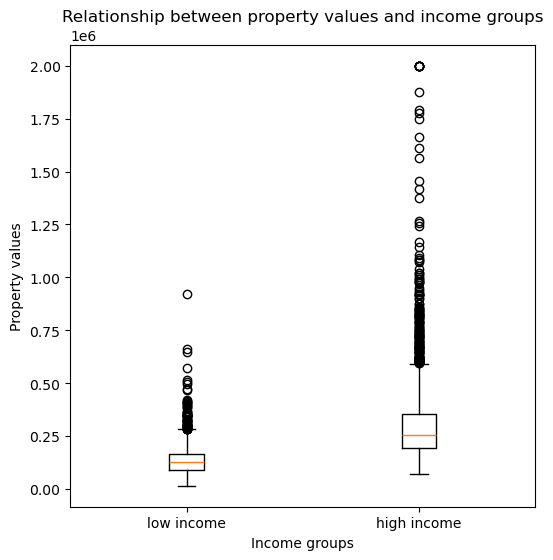

In [13]:
# box plot for the continuous property values and discrete income groups.
# prepare the data
df_two_income_groups = [df.loc[df['low_inc'], 'property_value_median'].values,
                          df.loc[df['high_inc'], 'property_value_median'].values]

#
plt.figure(figsize = (6, 6))
plt.boxplot(df_two_income_groups, labels = ['low income', 'high income'])
plt.xlabel('Income groups')
plt.ylabel('Property values')
plt.title("Relationship between property values and income groups")
plt.show()

In [14]:
df_two_income_groups

[array([179900., 254900., 147800., ..., 150620., 106800., 114400.]),
 array([240400., 205900., 433600., ..., 211200., 141700., 169800.])]

**Scatter plot**

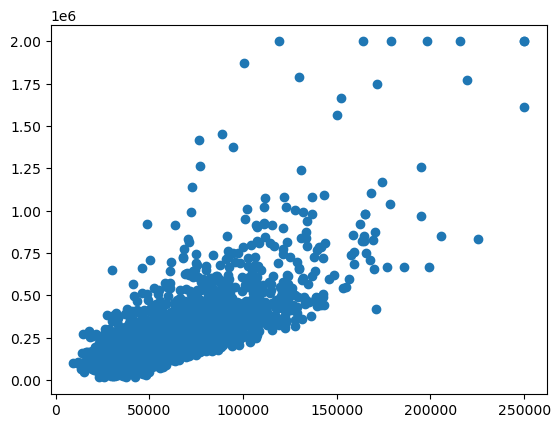

In [15]:
# scatter plot without formating
plt.scatter(df['inc_median_household'], df['property_value_median'])

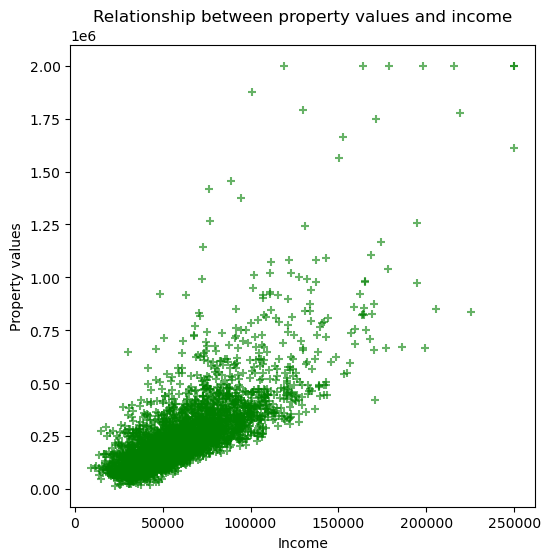

In [16]:
# scatter plot with formating
plt.figure(figsize = (6, 6))
plt.scatter(df['inc_median_household'], df['property_value_median'], color = 'green', marker='+', alpha = 0.6)
plt.xlabel('Income')
plt.ylabel('Property values')
plt.title("Relationship between property values and income")
plt.show()

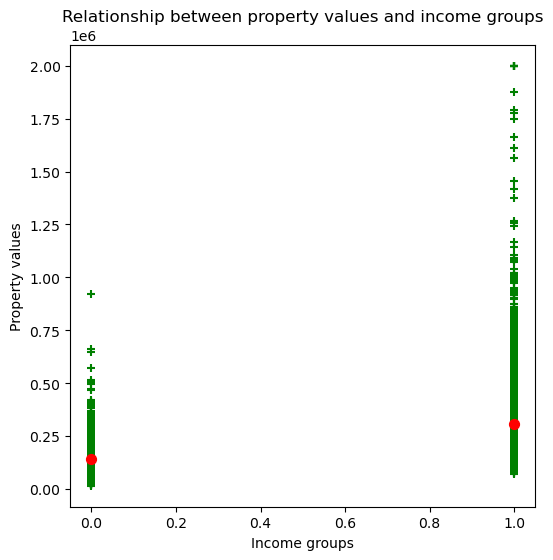

In [17]:
# scatter plot for discrete income group variable
# this is the figure on the lecture notes.
plt.figure(figsize = (6, 6))
plt.scatter(df['inc_median_household_discrete'], df['property_value_median'], color = 'green', marker='+')
plt.scatter([0,1], df.groupby('inc_median_household_discrete')['property_value_median'].mean(), color = 'red', s = 50) # plot the conditional mean values for the three income groups.
plt.xlabel('Income groups')
plt.ylabel('Property values')
plt.title("Relationship between property values and income groups")
plt.show()

/var/folders/jh/p1jvq4k96b78klmgl3dq5jwc0000gn/T/ipykernel_38741/3493467774.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


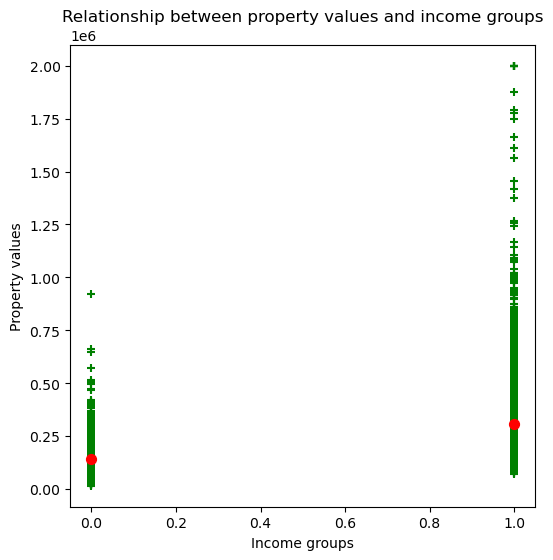

In [18]:
# scatter plot: object oriented programming. (different syntax)
fig, ax = plt.subplots(figsize = (6, 6)) # fig: the container for ALL the subplots. ax: a single OBJECT of the axes.
ax.scatter(df['inc_median_household_discrete'], df['property_value_median'], color = 'green', marker='+') # plot all the points
ax.scatter([0,1], df.groupby('inc_median_household_discrete')['property_value_median'].mean(), color = 'red', s = 50) # plot the conditional mean values for the three income groups.
ax.set_xlabel('Income groups')
ax.set_ylabel('Property values')
ax.set_title("Relationship between property values and income groups")
fig.show()

In [19]:
# one function for summarizing ALL variables.
df.describe()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio,inc_median_household_discrete
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,...,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000
mean,5015.991361,5015.991361,2452.798896,2563.192465,44.222558,1856.567555,5015.991361,3768.239981,806.102952,14.235661,...,0.067355,0.186833,0.075852,0.012188,0.274873,0.421618,0.442639,1.859330,0.170229,0.590113
std,2984.861332,2984.861332,1477.975329,1543.809972,10.775021,1035.615527,2984.861332,2464.146961,1142.443873,37.885856,...,0.058481,0.091609,0.052106,0.014606,0.144247,0.130152,0.098147,21.947510,0.127693,0.491872
min,11.000000,11.000000,0.000000,0.000000,11.900000,1.000000,11.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000145,0.078009,0.000000,0.000000
25%,3132.500000,3132.500000,1518.000000,1590.000000,36.700000,1229.000000,3132.500000,2237.500000,93.000000,0.000000,...,0.028017,0.113561,0.035775,0.002442,0.159026,0.330870,0.389400,0.970164,0.082090,0.000000
50%,4519.000000,4519.000000,2190.000000,2280.000000,42.100000,1699.000000,4519.000000,3394.000000,364.000000,0.000000,...,0.053666,0.175695,0.063911,0.007692,0.251489,0.398351,0.454632,1.216457,0.137882,1.000000
75%,6226.000000,6226.000000,3047.500000,3212.000000,49.950000,2272.500000,6226.000000,4788.500000,1018.000000,13.000000,...,0.089977,0.254685,0.105195,0.017034,0.374461,0.486031,0.506889,1.439495,0.217450,1.000000
max,39928.000000,39928.000000,18429.000000,21499.000000,82.800000,21209.000000,39928.000000,38768.000000,11482.000000,552.000000,...,0.733333,0.789474,0.481409,0.181996,1.000000,1.000000,0.802898,879.000000,1.000000,1.000000


### **Exercise 2.** Plot the relationship between median rent and median property values.


## Section 1. Linear regression

- Property value depends on many factors - but let's start with income.

### Linear Regression 1. Using only a constant term as the independent variable.

In [20]:
# Running a naive regression using only the constant.
X = pd.DataFrame(np.repeat(1, df.shape[0]))
X

,0
0,1
1,1
2,1
3,1
4,1
...,...
4162,1
4163,1
4164,1
4165,1


In [21]:
# choose the dependent var
y = df['property_value_median']

In [22]:
# fitting the model.
# launch the model using the independent and dependent variables
model = sm.OLS(y, X)
# fitting the model
results = model.fit()

In [23]:
# report the parameters
print("Parameters: ", results.params)

Parameters:  0    237906.519558
dtype: float64


In [24]:
# comparing the parameter to the summary statistics.
print("Average property value is: ", df['property_value_median'].mean())

Average property value is:  237906.51955843534


In [25]:
# report the R2
# note that the R2 is close to zero.
print("Parameters: ", results.rsquared)

Parameters:  0.0


### Linear Regression 2. Using a continuous variable as the independent variable.

In [26]:
# choose the independent variable
X = df['inc_median_household']
# add a constant to the independent variable
X = sm.add_constant(X)

In [27]:
# view the independent variables
X

,const,inc_median_household
0,1.0,53533.0
1,1.0,33958.0
2,1.0,40250.0
3,1.0,39962.0
4,1.0,63889.0
...,...,...
4162,1.0,76846.0
4163,1.0,72344.0
4164,1.0,65786.0
4165,1.0,59236.0


In [28]:
# choose the dependent var
y = df['property_value_median']

In [29]:
# fitting the model.
# launch the model using the independent and dependent variables
model = sm.OLS(y, X)
# fitting the model
results = model.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [30]:
# report the parameters
print("Parameters: ", results.params)

Parameters:  const                  -71696.096753
inc_median_household        5.193146
dtype: float64


In [31]:
# report the model fit (R2)
print("R2: ", results.rsquared)

R2:  0.5678562456275715


In [32]:
# report the predictions
results.predict()

array([206308.57193843, 104652.74488535, 137328.0176219 , ...,
       269940.18618525, 235925.08185842, 171732.60787614])

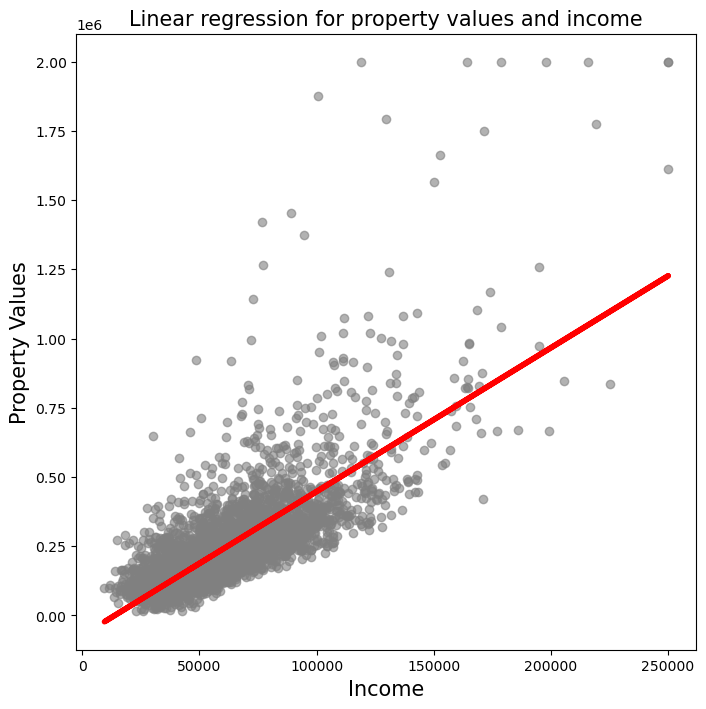

In [33]:
# Comparing the predicted and true values
# plot the fitted line
property_value_predicted = results.predict()

# another way to plot
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(df['inc_median_household'], df['property_value_median'], color = 'grey', alpha = 0.6)
ax.plot(df['inc_median_household'], property_value_predicted, color = 'red', lw = 4)
ax.set_xlabel('Income', fontsize = 15)
ax.set_ylabel('Property Values', fontsize = 15)
ax.set_title('Linear regression for property values and income', fontsize = 15)
plt.show()

In [34]:
# report the results.
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.568
Model:                               OLS   Adj. R-squared:                  0.568
Method:                    Least Squares   F-statistic:                     5473.
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:44:25   Log-Likelihood:                -54606.
No. Observations:                   4167   AIC:                         1.092e+05
Df Residuals:                       4165   BIC:                         1.092e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Linear Regression 3. Using a discrete variable as the independent variable.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


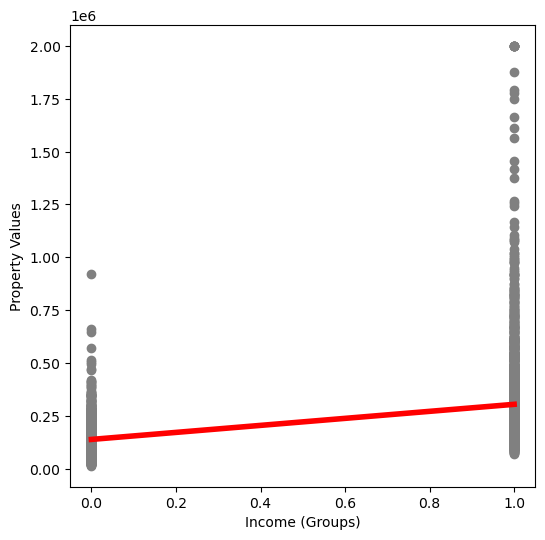

In [35]:
# Using the discrete income groups as an example.
# choose the independent variable
X = df['inc_median_household_discrete']
X = sm.add_constant(X)
y = df['property_value_median']
model = sm.OLS(y, X)
results = model.fit()
# results.predict()

# Comparing the predicted and true values
# plot the fitted line
property_value_predicted = results.predict()

# another way to plot
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(df['inc_median_household_discrete'], df['property_value_median'], color = 'grey')
ax.plot(df['inc_median_household_discrete'], property_value_predicted, color = 'red', lw = 4)
ax.set_xlabel('Income (Groups)')
ax.set_ylabel('Property Values')
plt.show()

In [36]:
# print the parameters
print("Parameters: ", results.params)

Parameters:  const                            140043.126464
inc_median_household_discrete    165838.454260
dtype: float64


In [37]:
# how to think about the parameter?
# compute the average property values for the two groups
low_income_average, high_income_average = df.groupby('inc_median_household_discrete')['property_value_median'].mean()
print("Property values from low and high income groups are:", low_income_average, high_income_average)

Property values from low and high income groups are: 140043.12646370023 305881.5807238715


In [38]:
# compute the property value differences between the two groups
property_value_gap_high_low = high_income_average - low_income_average
print("Property value difference between the low and high income groups: ", property_value_gap_high_low)


Property value difference between the low and high income groups:  165838.45426017125


In [39]:
# Summarize the regression results.
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.204
Model:                               OLS   Adj. R-squared:                  0.203
Method:                    Least Squares   F-statistic:                     1065.
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):          3.57e-208
Time:                           16:44:36   Log-Likelihood:                -55880.
No. Observations:                   4167   AIC:                         1.118e+05
Df Residuals:                       4165   BIC:                         1.118e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

### **Exercise 3**
Running a regression using automobile share as the dependent variable and income as the independent variable. Report R square and parameters, and print the OLS regression results.

In [40]:
df.columns

Index(['pop_total', 'sex_total', 'sex_male', 'sex_female', 'age_median',
       'households', 'race_total', 'race_white', 'race_black', 'race_native',
       'race_asian', 'inc_total_pop', 'inc_no_pop', 'inc_with_pop',
       'inc_pop_10k', 'inc_pop_1k_15k', 'inc_pop_15k_25k', 'inc_pop_25k_35k',
       'inc_pop_35k_50k', 'inc_pop_50k_65k', 'inc_pop_65k_75k', 'inc_pop_75k',
       'inc_median_ind', 'travel_total_to_work', 'travel_driving_to_work',
       'travel_pt_to_work', 'travel_taxi_to_work', 'travel_cycle_to_work',
       'travel_walk_to_work', 'travel_work_from_home', 'edu_total_pop',
       'bachelor_male_25_34', 'master_phd_male_25_34', 'bachelor_male_35_44',
       'master_phd_male_35_44', 'bachelor_male_45_64', 'master_phd_male_45_64',
       'bachelor_male_65_over', 'master_phd_male_65_over',
       'bachelor_female_25_34', 'master_phd_female_25_34',
       'bachelor_female_35_44', 'master_phd_female_35_44',
       'bachelor_female_45_64', 'master_phd_female_45_64',
       '

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


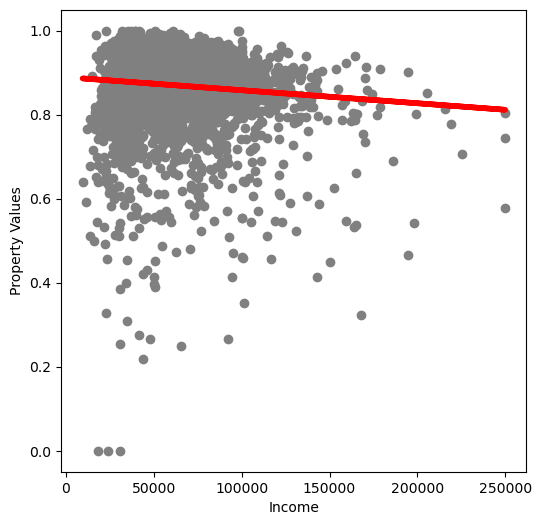

In [41]:
# Using the discrete income groups as an example.
# choose the independent variable
X = df['inc_median_household']
X = sm.add_constant(X)
y = df['travel_driving_ratio']
model = sm.OLS(y, X)
results = model.fit()
# results.predict()

# Comparing the predicted and true values
# plot the fitted line
property_value_predicted = results.predict()

# another way to plot
fig, ax = plt.subplots(figsize = (6, 6))
ax.scatter(df['inc_median_household'], df['travel_driving_ratio'], color = 'grey')
ax.plot(df['inc_median_household'], property_value_predicted, color = 'red', lw = 4)
ax.set_xlabel('Income')
ax.set_ylabel('Property Values')
plt.show()


In [42]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     travel_driving_ratio   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     34.31
Date:                  Tue, 28 Nov 2023   Prob (F-statistic):           5.07e-09
Time:                          16:44:38   Log-Likelihood:                 4135.3
No. Observations:                  4167   AIC:                            -8267.
Df Residuals:                      4165   BIC:                            -8254.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       